In [21]:
# Dataset: https://www.kaggle.com/datasets/gauravduttakiit/wind-turbine-power-generation-forecasting
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # Linear Regression Standard
from sklearn.metrics import mean_absolute_error # Extra metrics
from sklearn.model_selection import train_test_split

df = pd.read_excel('Train.xlsx') # 140k enteries
test_data = pd.read_csv('Test.csv') # Unlabelled so couldn't be used to test

df['Time'] = df['Time'].astype('int64')/3600000000000 # Converts to a valid format then from nanoseconds to hours

x = df[['WS_10m', 'WS_100m', 'WG_10m', 'Time']] # First 3 all have >0.5 correlation, and time is important 🤷‍♂️
y = df['Power'] # Data has "normalized between 0 and 1"

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Trained on 112k rows (rounded down)
# Tested on 28k rows (rounded down)

model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)

mae = mean_absolute_error(y_test, pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.14470611715995943
Mean Squared Error: 0.03444904261613343


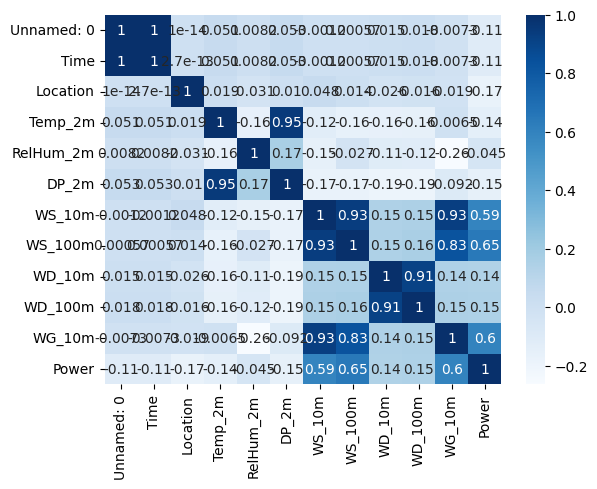

In [3]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()